### monte carlo simulation

in a stochastic process, two events are indipendent if the outcome of one event has no influence on the other
so it is equally likely to see 11111 as 23541.



In [ ]:
import random 

def rollDie():
    """
    returns a random int between 1 and 6
    """
    return random.choice([1, 2, 3, 4, 5, 6])

def rollN(n):
    result = ''
    for i in range(n):
        result += str(rollDie)
    print(result)
    
#rollN(X)

#### calculating simple probabilites 
as long as the instances are indipendent they can be multiplied together to give a result of the two instances happening.

for example two dies being rolled and what is the probability one is a 6 and the other is a 1 

#### Inferential statistics
for this course a rqandom sample will tend to exhibit the same properties as the population it is from

if we flip a coin hundred times and it all turn up heads does it mean theat the prob it turns all head is 1, unlikely right, intuition is that it is biased.

In [3]:
import random
import statistics

def flip(numflips):
    """will return the prob of heads per instance

    Args:
        numflips (_int_): _num of flips to be done for the coin_
    """
    heads = 0
    for i in range(numflips):
        if random.choice([0, 1]) == 0:
            heads += 1
    return heads / numflips

def driver(numtrials, numflipspertrial):
    fracheads = list()
    for i in range(numtrials):
        fracheads.append(flip(numflipspertrial))
    return statistics.mean(fracheads)

driver(1000, 100)
        

0.50223

how many samples do we have to look at till we have justified confidence in our answer.

the variance which is a measure of how much spread there is in the possible diff outcomes. it tells us what fraction of the values are close to the mean.

the standard dev is the square root of the variance

In [11]:
# how to calculate standard deviation
import statistics

def variance(x):
    """returns the standard deviation of the list

    Args:
        x (_list_): _a list of numbers_
    """
    mean = statistics.mean(x)
    tot = 0.0
    for num in x:
        tot += (num-mean)**2
    return tot/len(x)

def stdDev(x):
    return variance(x)**0.5

In [ ]:
pylab.hist(vals, bins = 10)
# this automatically sorts the values into 1o different bins , equal fraction of values on the x axis

### frequency dstribution
tells us how often a random variable has taen on a value in some range
provides info about the relative frequency of various ranges

- discrete random variable
take on a finite set of numbers (values on a die)
- continous random variable
take on any infinite real values (height of students in a class)



### normal distribution
to generate the distribution

random.guass(mu, sigma)

most real world things can be modelled after a normal distribution such as a plants height and leaf size so a normal distribution that is generated is a good model to use.

##### emperical rule
- 68% of data will always lie within one standard dev
- 95% of data will lie wuithin two standard dev
- 99% within three standard dev

the confidence interval and the confience level are intended to indicate the reliability of the estimate
as the confidence interval widen the confidence level will also increase 



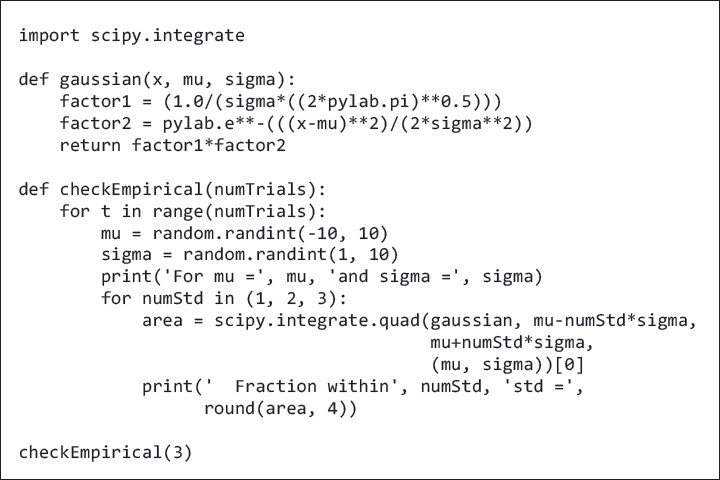

### binomial and multinomial distributions
distribution has two categories, either success or failure

binomial distribution
- probabnility of a test succeeding exactly k times in n indipendent trials

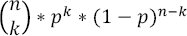
- n = number of times test done
- k = number of succesful tries
- p = the probability of the instance being successful

Implement a function that calculates the probability of rolling exactly two 3’s in k rolls of a fair die. Use this function to plot the probability as k varies from 2 to 100.


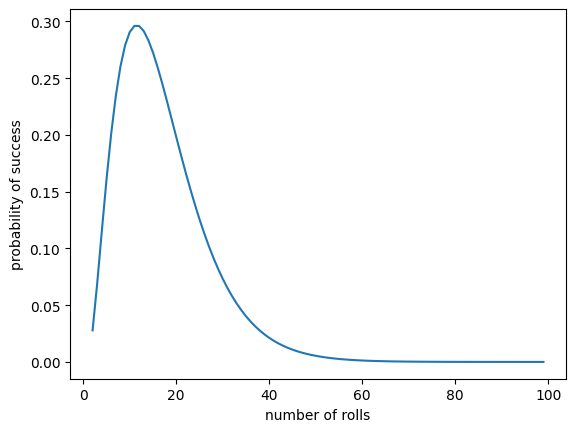

In [30]:
import math
import statistics
import pylab

def rollprob(n, k, p):
    """_summary_

    Args:
        n (_int_): number of times test done
        k (_int_): succesful tries per trial done
        p (_float_): the probability of something happening
    """
    y_val = list()
    x_val = range(2, n)
    for x in x_val:
        probability = math.comb(x, k) * (p)**k * (1-p)**(x-k)
        y_val.append(probability)
    
    pylab.plot(x_val, y_val)
    pylab.xlabel('number of rolls')
    pylab.ylabel('probability of success')

rollprob(100, 2, 1/6)
        

### continuous and discrete uniform distributions
continuous uniform distribution has the property wher all intervals of the same length have the same probability
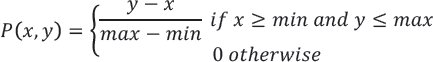
discrete uniform distribution occur when each possible value occurs equally often but space of possible values not continuous

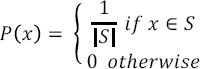

### exponential and geometric distributions
they are used to model inter-arrival times

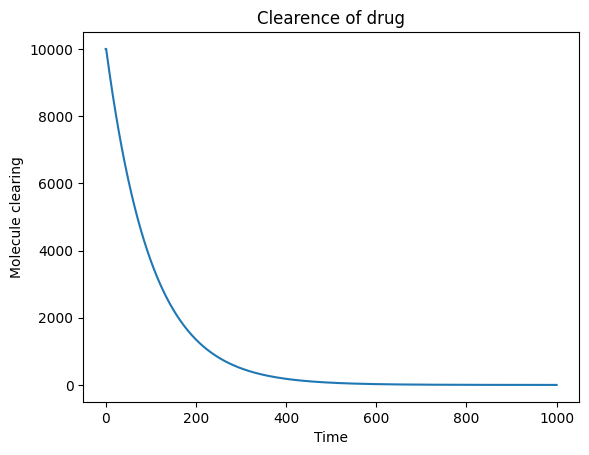

In [34]:
# modelling the time taken for drug to leave the body
def clear(n, p, steps):
    """generating data for the time taken for the body to clear drug
        from the system

    Args:
        n (_int_): initial number of molecules
        p (_float_): the probability of the molecule being cleared
        steps (int): the length of the simulation
    """
    num_remaining = [n]
    for t in range(steps):
        num_remaining.append(n*((1-p)**t))
    pylab.plot(num_remaining)
    pylab.xlabel('Time')
    pylab.ylabel('Molecule clearing')
    pylab.title('Clearence of drug')

clear(10000, 0.01, 1000)

example above is an exponential decay

the gradient of the log scale of the graph is rate of decay

### geometric distribution
discrete analog of the exponential distribution
- describing the numer of indipendent attempts required to achieve a first success or first failure.


Text(0.5, 1.0, 'Probability of Starting Each Try = 0.5')

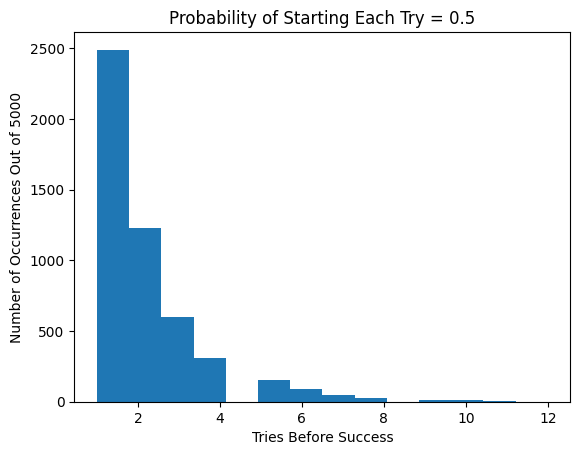

In [40]:
def successfulStarts (successProb, numTrials):
    """
    "Assumes successProb is a float representing probability of a
    single attempt being successful. numTrials a positive int Returns
    a list of the number of attempts needed before a success for each trial.
    """
    triesBeforeSuccess = []
    for t in range(numTrials):
        consecFailures = 0
        while random.random() > successProb:
            consecFailures += 1
            triesBeforeSuccess.append(consecFailures)
    return triesBeforeSuccess

probOfSuccess = 0.5
numTrials = 5000
distribution = successfulStarts (probOfSuccess, numTrials)
pylab.hist (distribution, bins = 14)
pylab.xlabel('Tries Before Success')
pylab.ylabel('Number of Occurrences Out of ' + str(numTrials))
pylab.title('Probability of Starting Each Try = ' + str(probOfSuccess))

### benford distribution
let s be a large set of decimal integers, how freq would you expect each nonzero digit to appear as the first digit

set of decimals satisdies benfords law if prob of the first digit being d consistent with P(d) = log10(1 + 1/d)

data like the fibbonaci sequence iphone pass codes, the number of twitter followers per user also follow this law